# Exploratory Data Analysis
- Author: Marcellinus Aditya Witarsah
- Date: 20 July 2024

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Imports
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple

# About the Data
Table information about the dataset from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).
|      **Feature Name**      |               **Description**               |
|:--------------------------:|:-------------------------------------------:|
| person_age                 | Age                                         |
| person_income              | Annual Income                               |
| person_home_ownership      | Home ownership                              |
| person_emp_length          | Employment length (in years)                |
| loan_intent                | Loan intent                                 |
| loan_grade                 | Loan grade                                  |
| loan_amnt                  | Loan amount                                 |
| loan_int_rate              | Interest rate                               |
| loan_status                | Loan status (0 is non default 1 is default) |
| loan_percent_income        | Percent income                              |
| cb_person_default_on_file  | Historical default                          |
| cb_preson_cred_hist_length | Credit history length                       |

# Data Load

In [2]:
# Load and inspect data
df = pd.read_csv("../data/raw/credit_risk_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Exploratory Data Analysis

## Univariate Analysis
Analyzing predictor variable one by one.

### How is the proportion of the response variable?

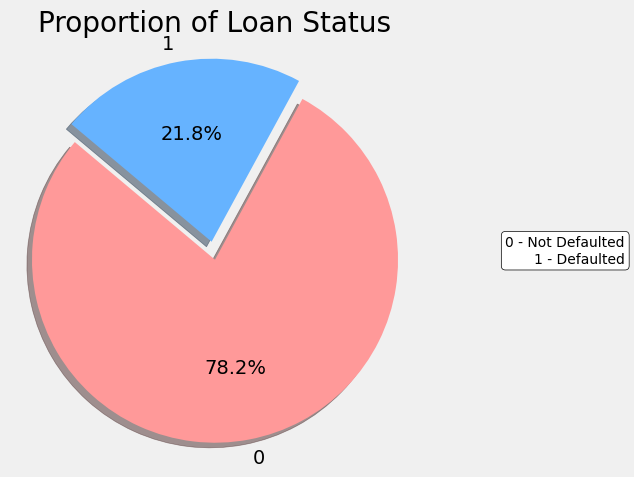

In [3]:
plt.style.use('fivethirtyeight')

# Count the values of "loan_status"
loan_status_counts = df["loan_status"].value_counts()

# Create labels and sizes for the pie chart
labels = ["0", "1"]
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Proportion of Loan Status")

# Add annotation
annotation = (
    "0 - Not Defaulted\n"
    "1 - Defaulted"
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords="axes fraction", ha="right", va="center", fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.savefig("../reports/figures/proportion_of_loan_status.png", bbox_inches = 'tight')
plt.show()

#### Answer
The response variable is unbalanced, with Good Customers (0) making up approximately **78.2%** and Bad Customers (1) making up about **21.8%**. This imbalance is common in the credit industry, as most users are not expected to default.

### Were there missing values inside the predictor variables?

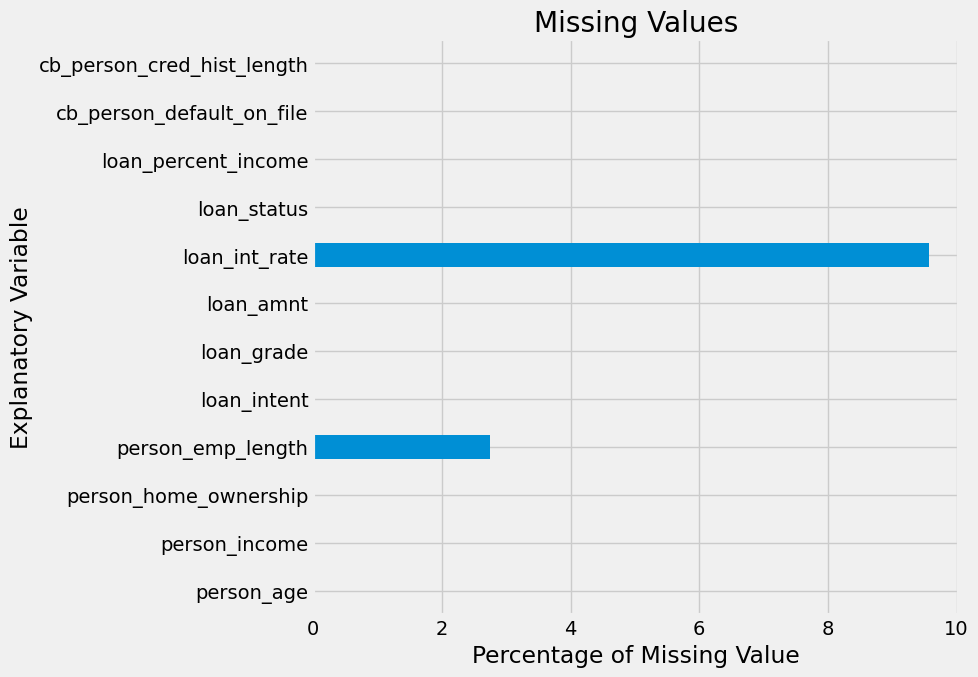

In [4]:
# Count percentage missing values
missing_values_count = df.isna().sum()
(missing_values_count / len(df) * 100).plot(kind="barh", figsize=(10, 7))
plt.title("Missing Values")
plt.xlabel("Percentage of Missing Value")
plt.ylabel("Explanatory Variable")
plt.tight_layout()
plt.savefig("../reports/figures/missing_values.png", bbox_inches = 'tight')
plt.show()

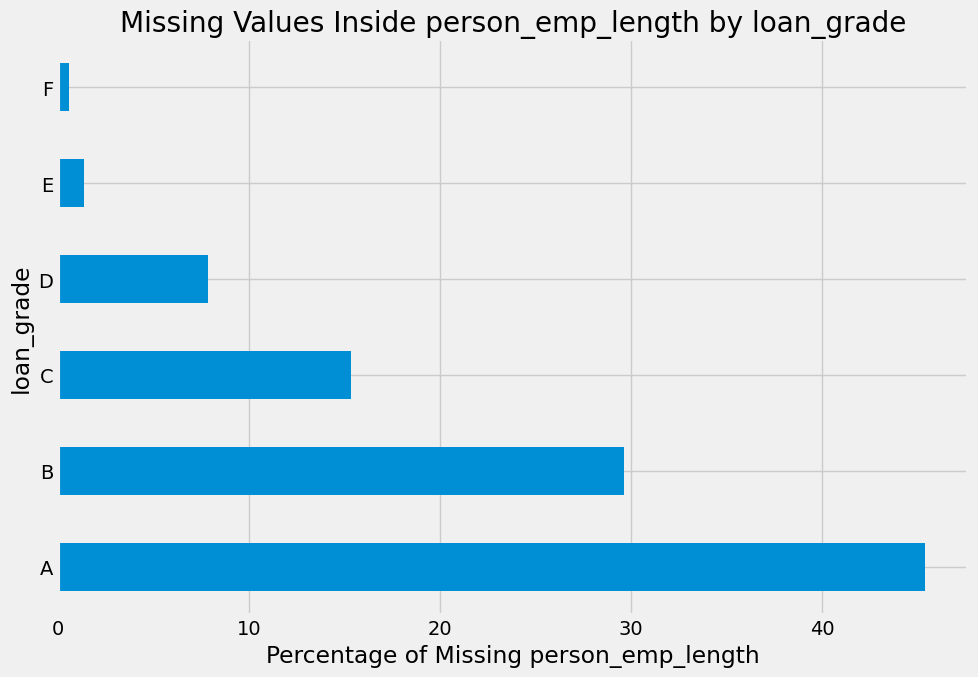

In [5]:
(df[df['person_emp_length'].isna()]['loan_grade'].value_counts(normalize=True)*100).plot(kind="barh", figsize=(10, 7))
plt.title("Missing Values Inside person_emp_length by loan_grade")
plt.xlabel("Percentage of Missing person_emp_length")
plt.ylabel("loan_grade")
plt.tight_layout()
plt.savefig("../reports/figures/missing_values_inside_person_emp_length_by_loan_grade.png", bbox_inches = 'tight')
plt.show()

In [6]:
df[df['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


#### Answer
There are missing values in the `person_emp_length` and `loan_int_rate` variables.
1. Missing values in `person_emp_length` may indicate unemployment or self-employment. To address this, they are filled with 0 values. Further analysis revealed that most applicants with missing `person_emp_length` have high loan_grade, with approximately 75% falling into grades A and B. This suggests they could be either **business owners or unemployed with alternative income sources**.
2. Missing values in `loan_int_rate` may result from human or system errors. Further investigation is needed to determine the cause. **For this project, missing values are replaced with the mean or median, based on the data distribution**.


### How is the distribution for the numerical predictor variable? Are there any outliers or anomalies?

In [7]:
def plot_hist_box(df: pd.DataFrame, numerical_predictor_variable: str,figsize: Tuple[int, int]) -> None:
    """
    Show distribution of numerical data by histogram plot and boxplot.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_predictor_variable (str): numerical columns to be plotted
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns

    # Histogram
    df[numerical_predictor_variable].hist(ax=ax[0], bins=30, edgecolor='black')
    mean_value = df[numerical_predictor_variable].mean()
    median_value = df[numerical_predictor_variable].median()
    ax[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax[0].axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    ax[0].set_title(f"Histogram of {numerical_predictor_variable}")
    ax[0].set_xlabel(numerical_predictor_variable)
    ax[0].set_ylabel("Frequency")
    ax[0].legend()

    # Boxplot
    df.boxplot(column=numerical_predictor_variable, ax=ax[1])
    ax[1].set_title(f"Boxplot of {numerical_predictor_variable}")
    ax[1].set_xlabel(numerical_predictor_variable)
    ax[1].set_ylabel("Value")

    # Show plots
    plt.tight_layout()
    plt.savefig(f"../reports/figures/histogram_boxplot_of_{numerical_predictor_variable}.png", bbox_inches = 'tight')
    plt.show()

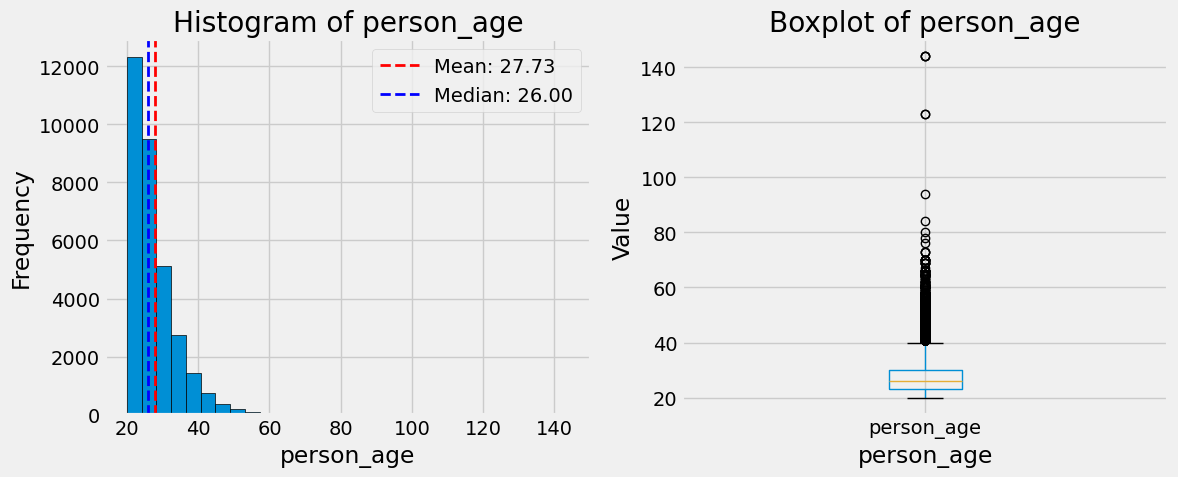

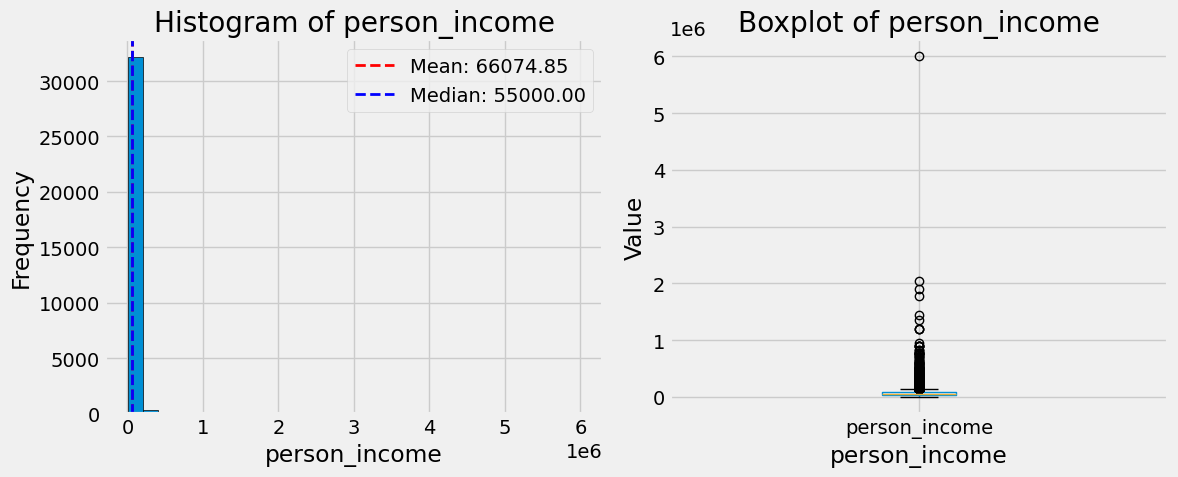

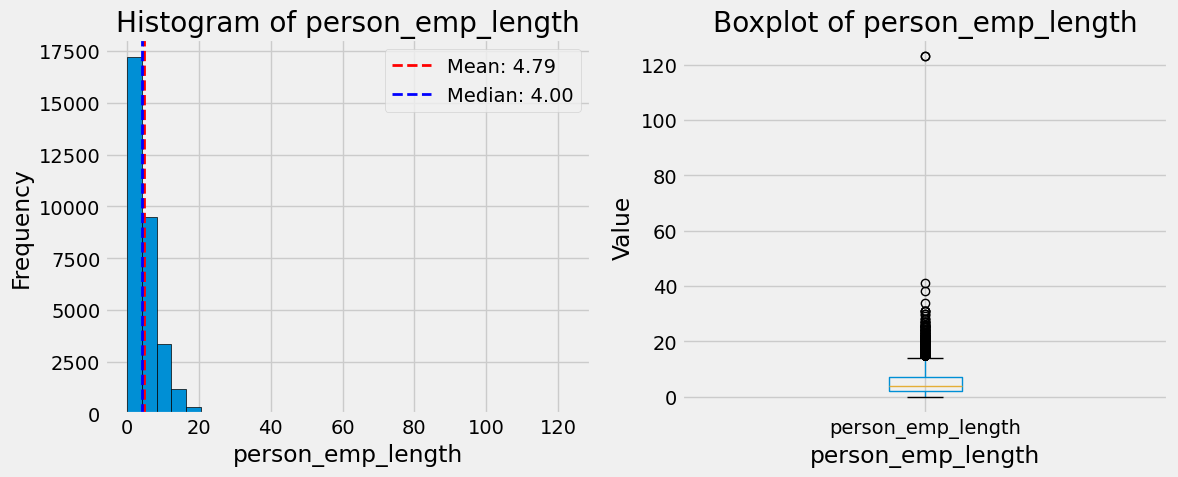

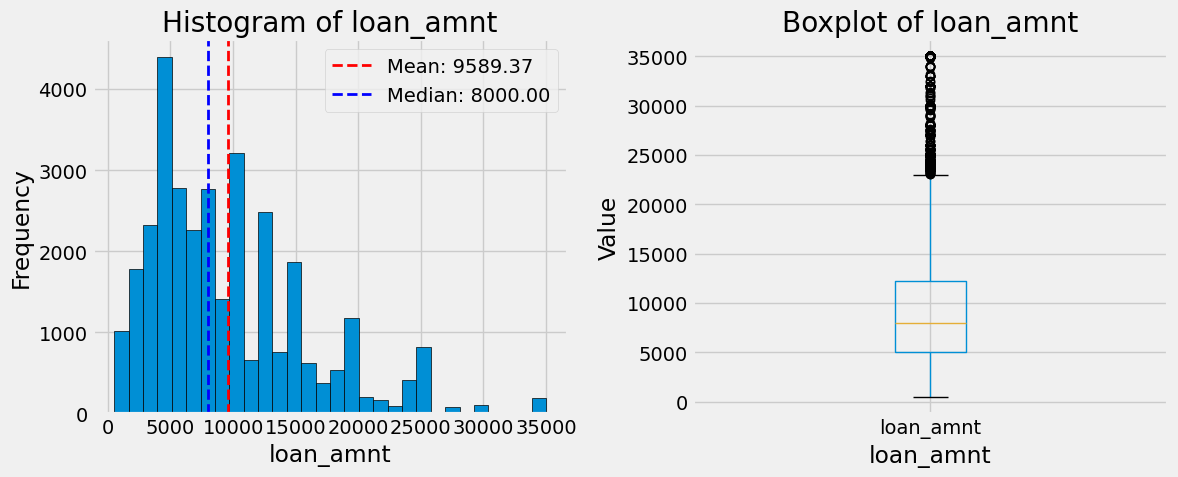

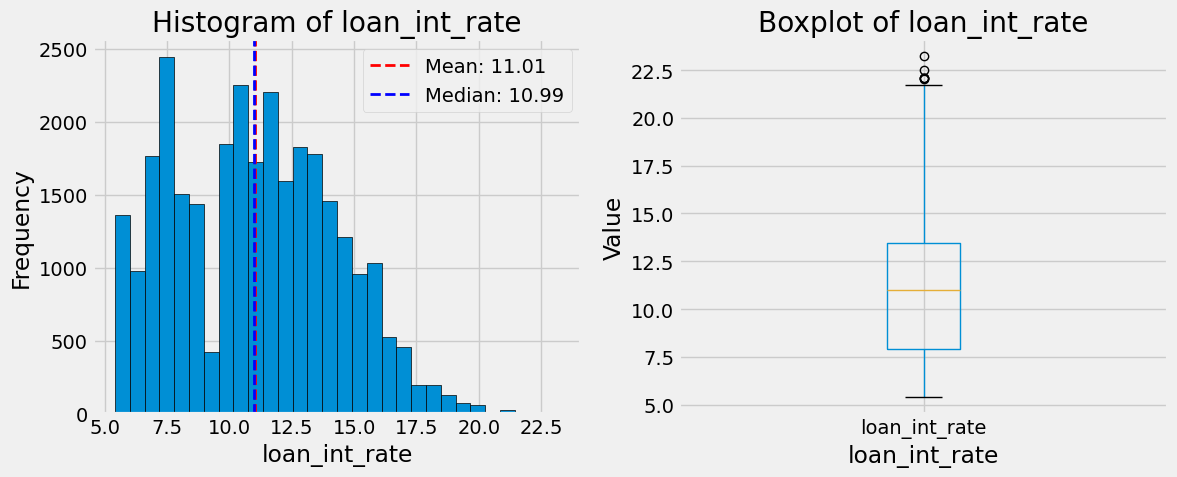

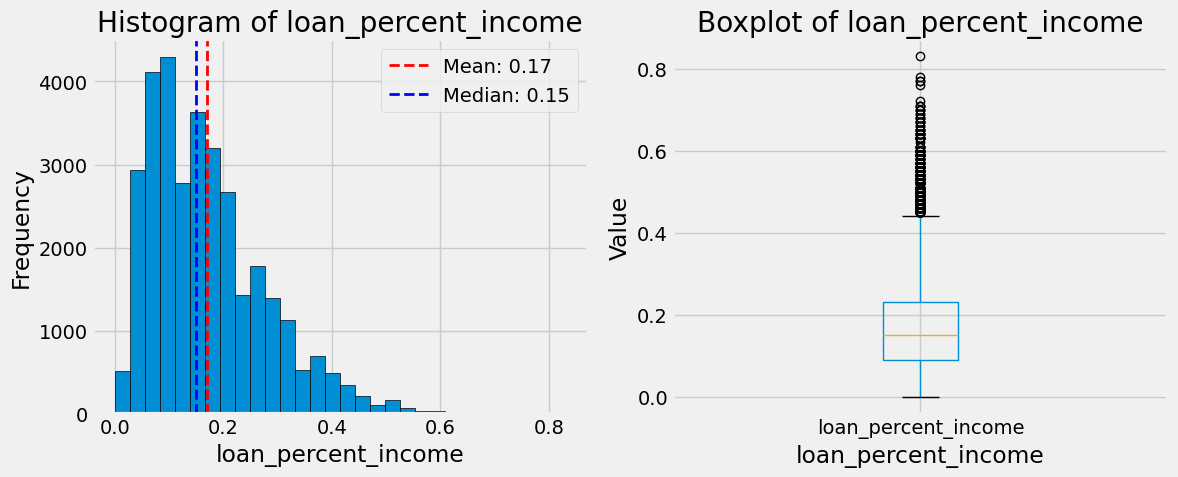

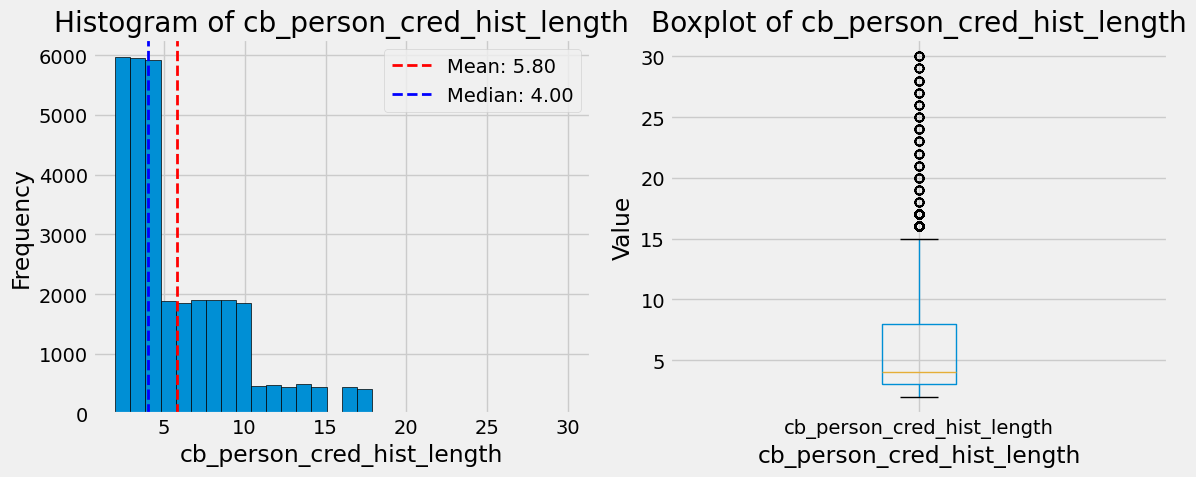

In [8]:
# Plot histogram and boxplot
plt.style.use('fivethirtyeight')
for predictor_variable in df.select_dtypes("number").columns:
    if predictor_variable != "loan_status":
        plot_hist_box(df, predictor_variable, (12, 5))

In [9]:
for predictor_variable in df.select_dtypes("number").columns:
    if predictor_variable != "loan_status":
        print(f"{predictor_variable}: {df[predictor_variable].skew()}")

person_age: 2.5813925261849846
person_income: 32.865348833904434
person_emp_length: 2.6144551214595424
loan_amnt: 1.1924774277661998
loan_int_rate: 0.2085503016908977
loan_percent_income: 1.0646686367683245
cb_person_cred_hist_length: 1.6617901199126253


In [10]:
df[df["person_age"] > 122]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Suspected outliers are detected in the `person_age` variable, where the maximum observed age is 122 years old. To address this issue, records with a `person_age` above 122 are removed.

In [11]:
df[df["person_emp_length"] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


Outliers are also present in the `person_emp_length` variable, where values exceed a realistic employment duration, such as 123 years for applicants aged 21 and 22. To address this, we can either remove these records or replace the outliers with the average employment duration for applicants within the same age range.

In [12]:
df[df["cb_person_cred_hist_length"] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


Checking if there are loan applications have a credit history way longer than their age.

#### Answer
**Positive outliers are observed in all predictor variables, resulting in right-skewed distributions. Some of these outliers are explainable**:
1. `person_income`: High net worth individuals (HNWIs) contribute to the skewness in income distributions.
2. `loan_amnt`: Borrowers with higher incomes may seek larger loan amounts.
3. `loan_int_rate`: Higher loan interest rates may apply to customers perceived as high-risk.
4. `loan_percent_income`: Some borrowers may request loans closer to their income percentage, potentially due to emergencies.
5. `cb_person_cred_hist_length`: Some individuals have exceptionally long credit histories.

**Anomalies in the data include**:
1. `person_age`: While the oldest recorded individuals lived to 122 years, some entries in the dataset exceed this limit. To address this, records with `person_age` above 122 are removed, as they represent only a small fraction of the dataset (5 records).
2. `person_emp_length`: It's impossible for loan applicants aged 21 and 22 to have worked for 123 years. To rectify this, replace these outlier values with the common employment duration for their age range.

### How is the occurence of categorical predictor variable?

In [13]:
def plot_count_categorical(df: pd.DataFrame, categorical_predictor_variable: str, figsize: Tuple[int, int]) -> None:
    """
    Show number of occurences of each categorical column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_column (str): The numerical column to be plotted.
        categorical_predictor_variable (str): categorical columns to be plotted
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure

    # Bar plot
    df[categorical_predictor_variable].value_counts(normalize=True).plot(kind='barh', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_predictor_variable}")
    ax.set_xlabel(categorical_predictor_variable)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.savefig(f"../reports/figures/countplot_of_{categorical_predictor_variable}.png", bbox_inches = 'tight')
    plt.show()

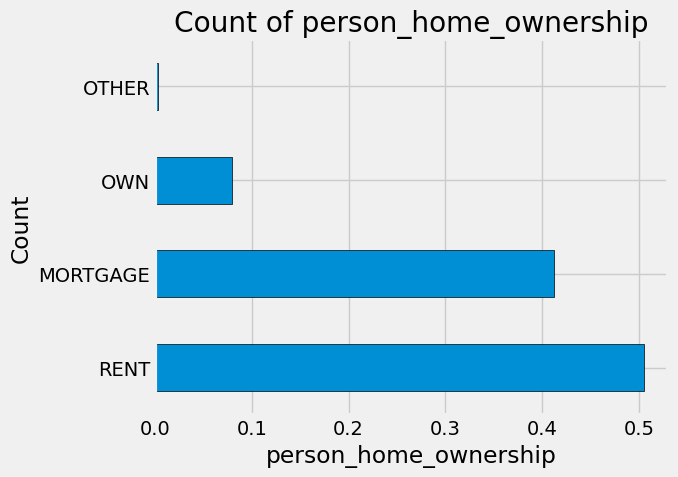

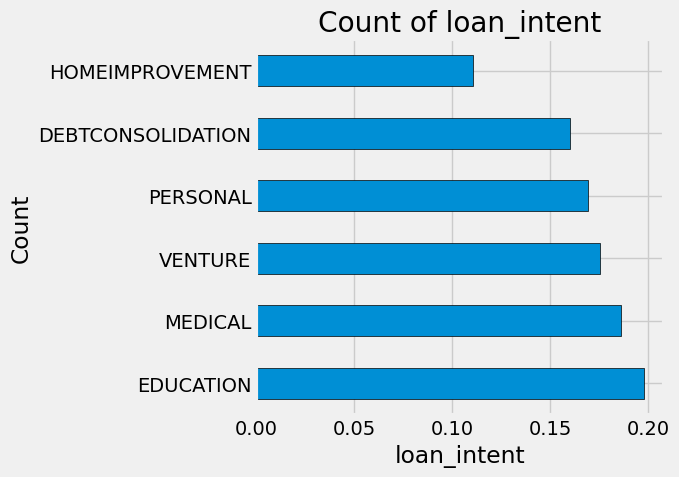

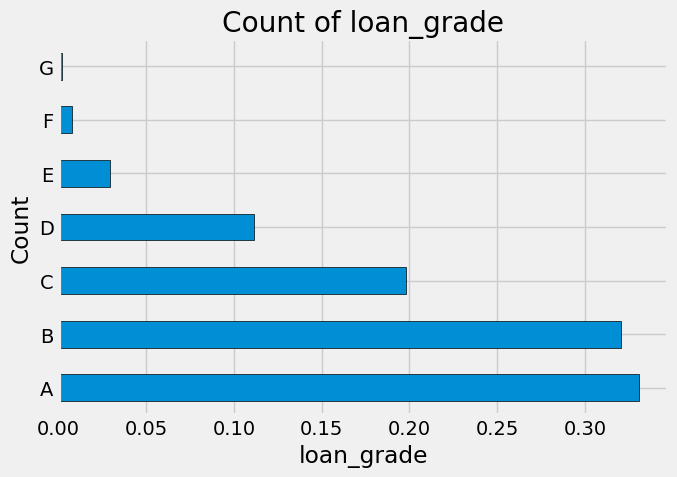

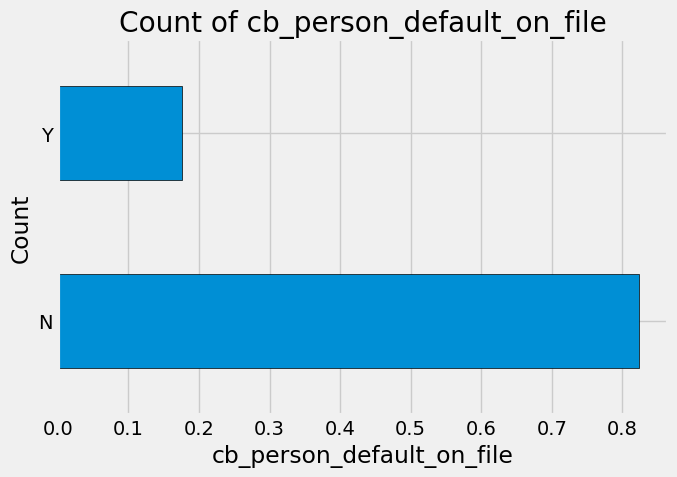

In [14]:
plt.style.use('fivethirtyeight')
for predictor_variable in df.select_dtypes("object").columns:
    plot_count_categorical(df, predictor_variable, (7, 5))

#### Answer
The occurences of:
1. `person_home_ownership` around 90% of loan applications still don't own a property or home where 50% of them is still renting and 40% of them still on mortgage.
2. `loan_intent` are almost distributed evenly around each category.
3. `loan_grade` around 65% of the loan applicants has a good loan grade, A and B.
4. `cb_person_default_on_file` almost 20% of the customers had history of credit default. 

## Multivariate Analysis

### What is the distribution of the numerical predictor variable across different classes of the response target variable?

In [15]:
def plot_dist_numerical_by_target(df: pd.DataFrame, numerical_predictor_variable: str, response_variable: str, figsize: Tuple[int, int]) -> None:
    """
    Show distribution and boxplot of a numerical column, grouped by a target column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_predictor_variable (str): The numerical column to be plotted.
        response_variable (str): The target column for grouping.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, axes = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns

    # KDE plot with hue
    for target_value in df[response_variable].unique():
        sns.kdeplot(data=df[df[response_variable]==target_value], x=numerical_predictor_variable, ax=axes[0], label=target_value)
    axes[0].set_title(f"Distribution of {numerical_predictor_variable}")
    axes[0].set_xlabel(numerical_predictor_variable)
    axes[0].set_ylabel("Density")
    axes[0].legend(title=response_variable)

    # Boxplot with hue
    sns.boxplot(x=response_variable, y=numerical_predictor_variable, data=df, hue=response_variable, ax=axes[1])
    axes[1].set_title(f"Boxplot of {numerical_predictor_variable}")
    axes[1].set_xlabel(response_variable)
    axes[1].set_ylabel(numerical_predictor_variable)

    # Show plots
    plt.tight_layout()
    plt.savefig(f"../reports/figures/histogram_{numerical_predictor_variable}_vs_{response_variable}.png", bbox_inches = 'tight')
    plt.show()


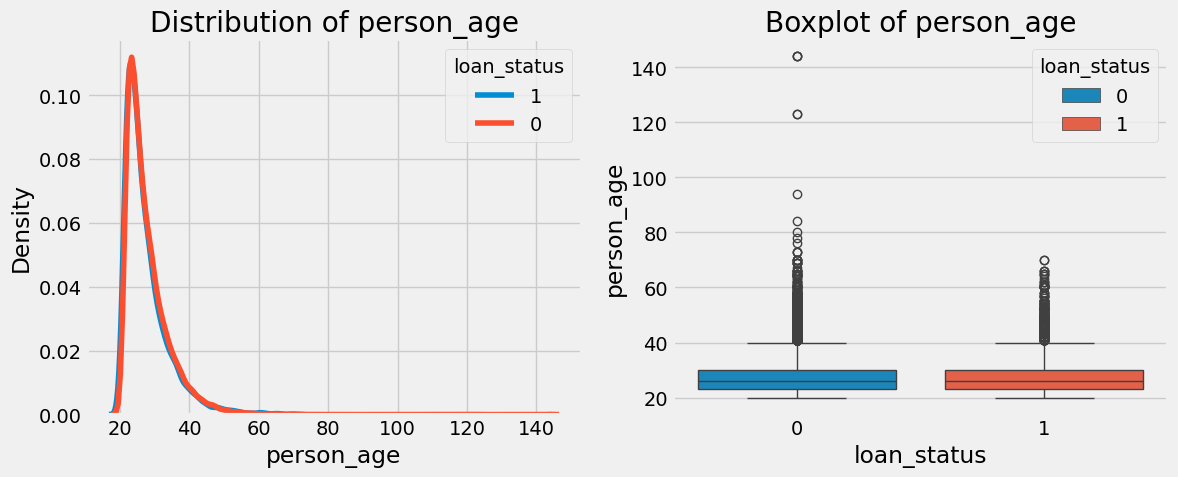

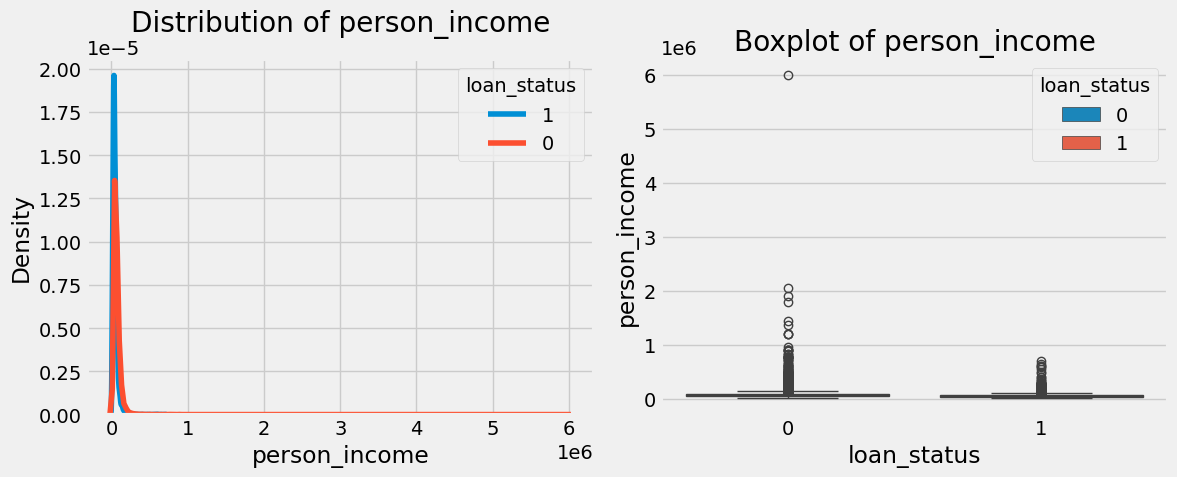

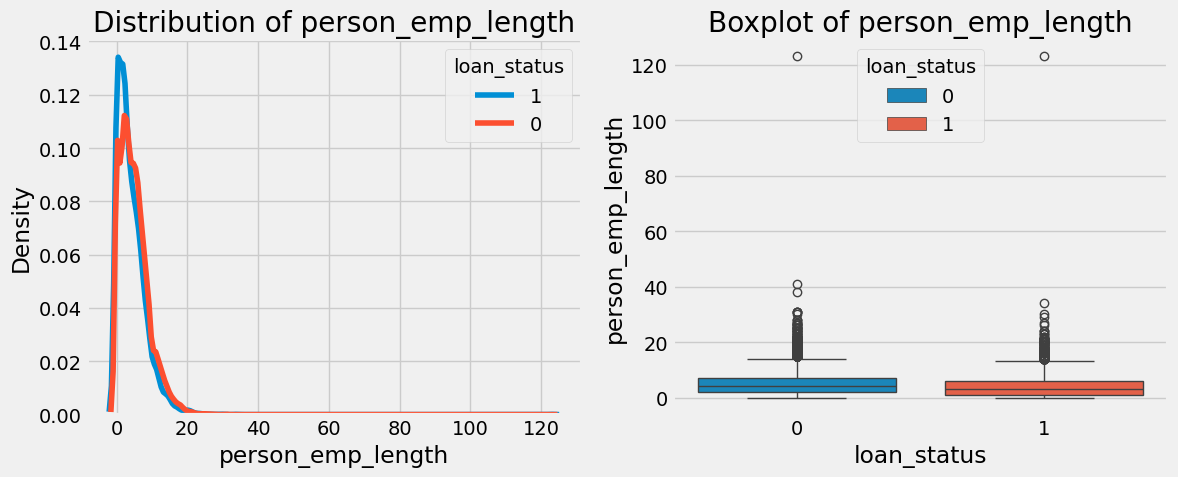

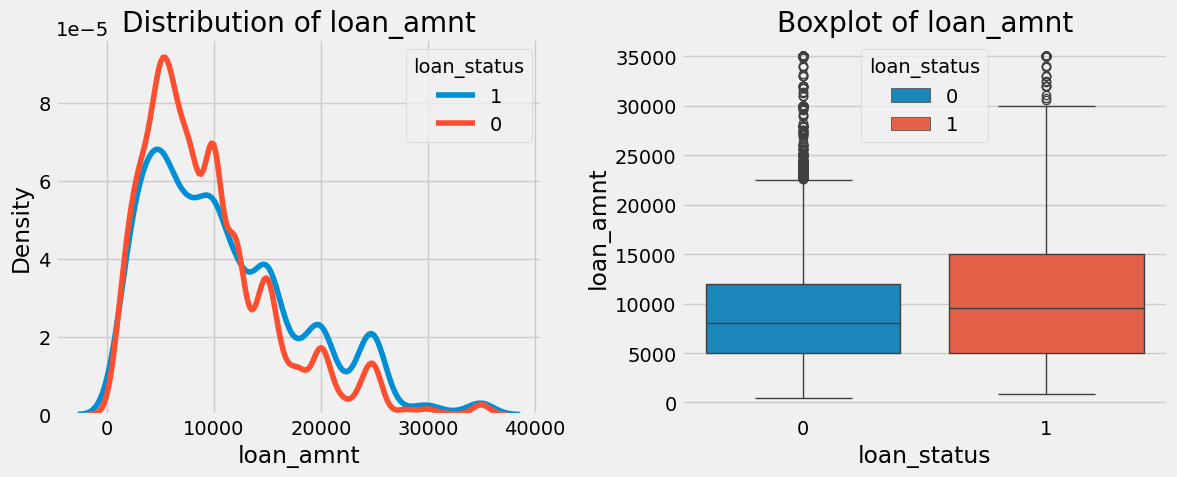

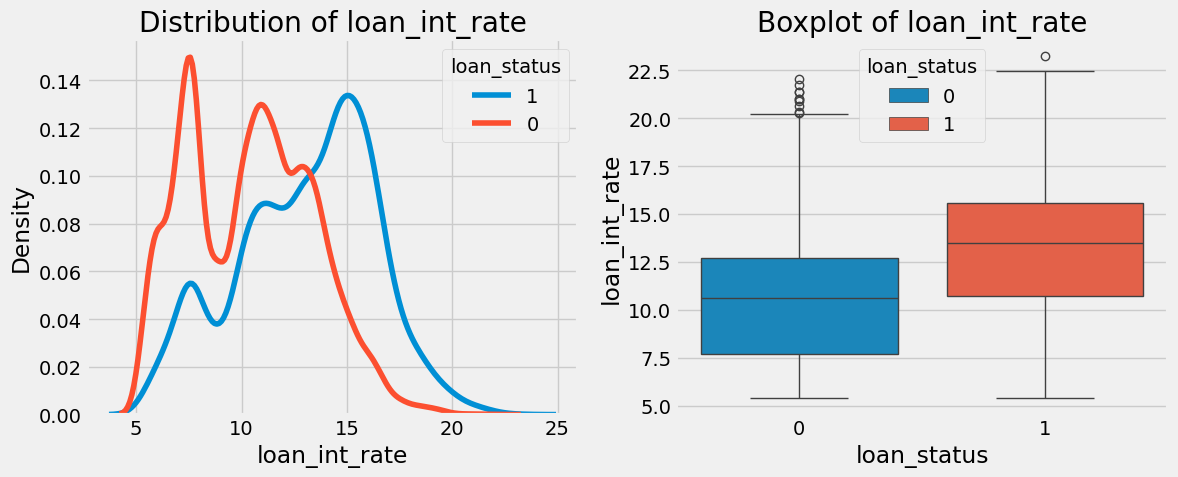

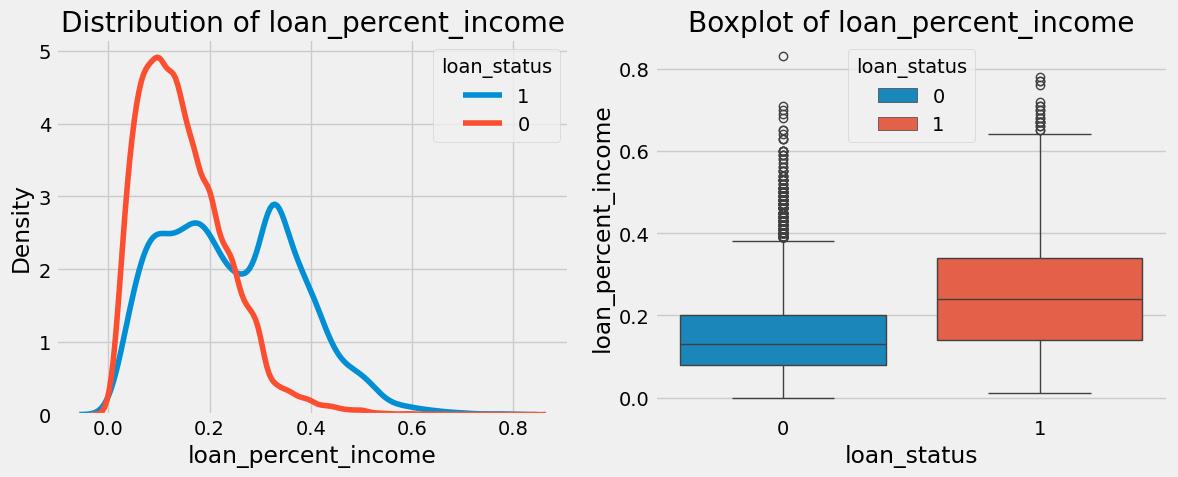

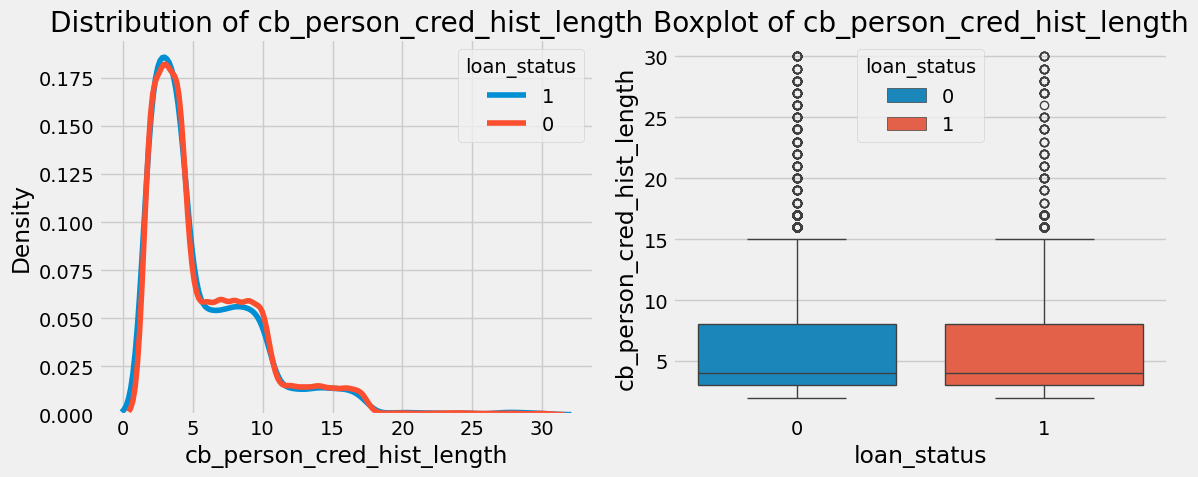

In [16]:
for predictor_variable in df.select_dtypes("number").columns:
    if predictor_variable != "loan_status":
        plot_dist_numerical_by_target(df, predictor_variable, "loan_status", (12, 5))

#### Answer
Distributions of `loan_int_rate` and `loan_percent_income` vary based on the response variable, suggesting that higher values of these features correlate with a higher likelihood of default.

### Do certain categories of the categorical predictor variable have higher or lower probabilities of a specific class in the response variable?

In [17]:
def plot_probability_response_by_categorical(df: pd.DataFrame, categorical_predictor_variable: str, response_variable: str, figsize: Tuple[int, int]) -> None:
    '''
    Show count of values inside categorical column, grouped by a response column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        categorical_predictor_variable (str): The categorical column to be plotted.
        response_variable (str): The response column for grouping.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    '''
    fig, ax = plt.subplots(figsize=figsize)  # Create a figure
    # Calculate normalized value counts
    proportions = df.groupby(categorical_predictor_variable)[response_variable].value_counts(normalize=True).sort_values().unstack().sort_values(by=1)

    # Plotting the proportions
    proportions.plot(kind='barh', stacked=True, ax=ax)
    ax.set_xlabel(categorical_predictor_variable)
    ax.set_ylabel('Proportion')
    ax.set_title(f'Probability of Default Given {categorical_predictor_variable}')
    ax.legend(title=response_variable)

    # Add annotations for class 1
    for i in range(len(proportions)):
        if 1 in proportions.columns:
            proportion_value = proportions.iloc[i][1]
            ax.annotate(f'{proportion_value:.2f}', 
                        xy=(1-proportion_value, i), 
                        xytext=(3, 0), 
                        textcoords='offset points', 
                        va='center', 
                        ha='left', 
                        color='white' if proportion_value < 0.5 else 'black', 
                        fontsize=10, 
                        fontweight='bold')
    # Show plot
    plt.tight_layout()
    plt.savefig(f"../reports/figures/probability_default_by_given_{categorical_predictor_variable}", bbox_inches = 'tight')
    plt.show()



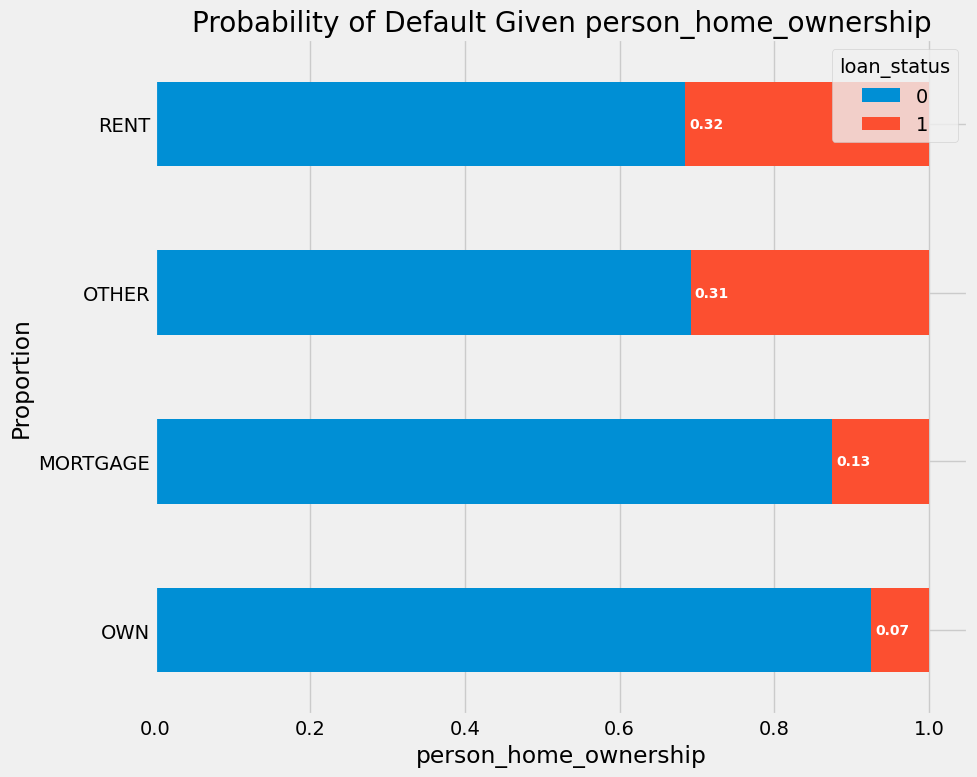

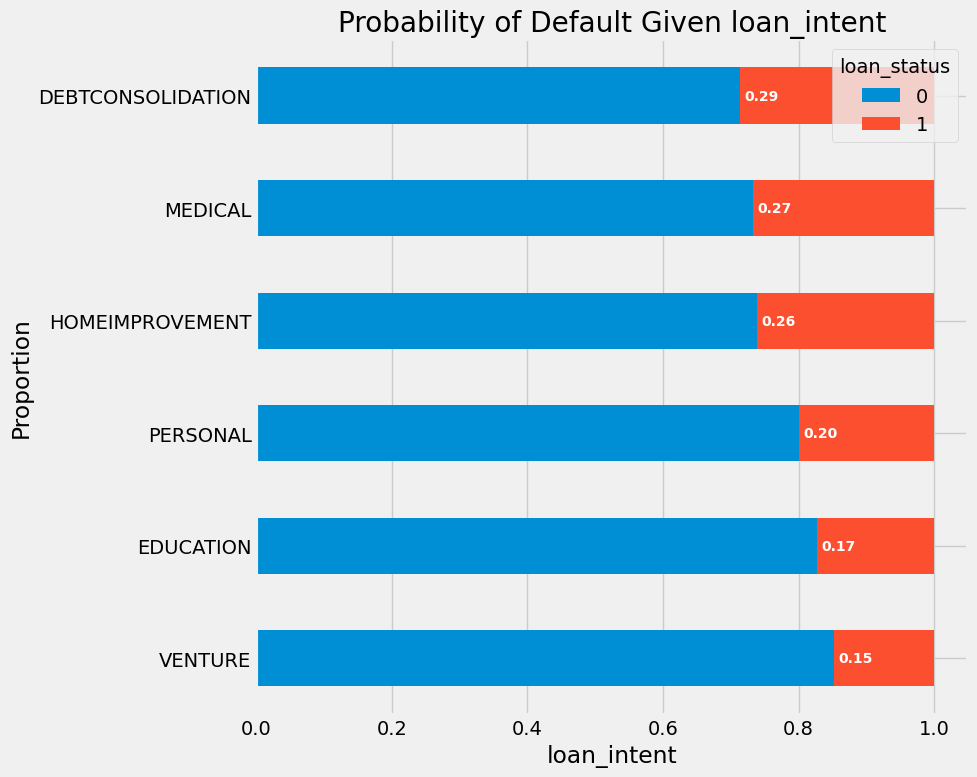

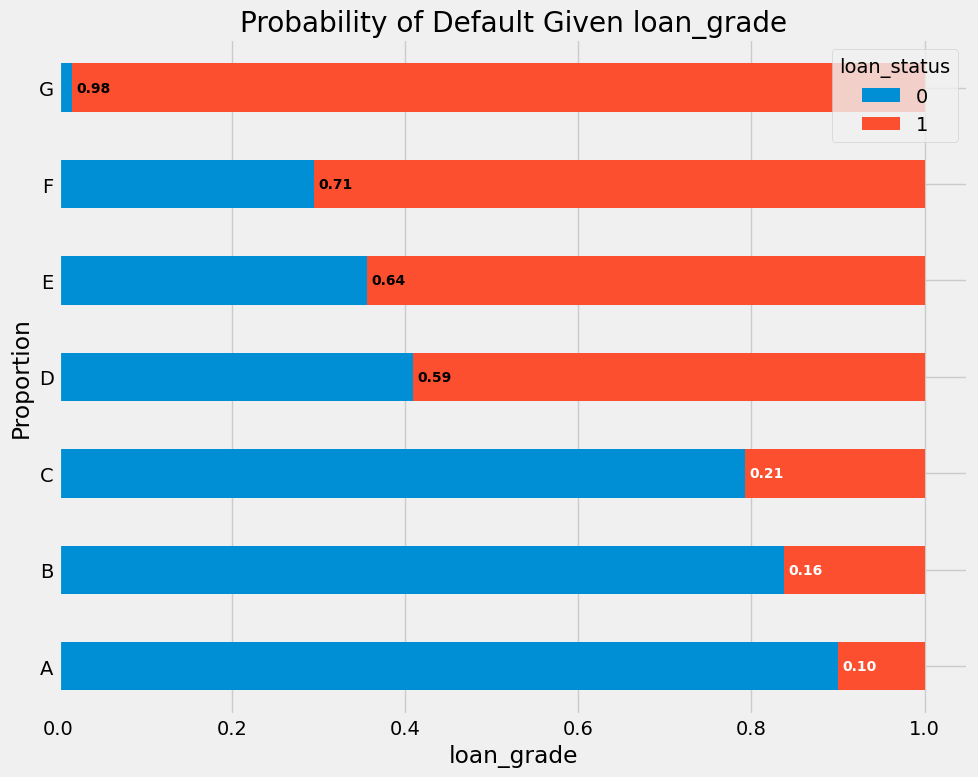

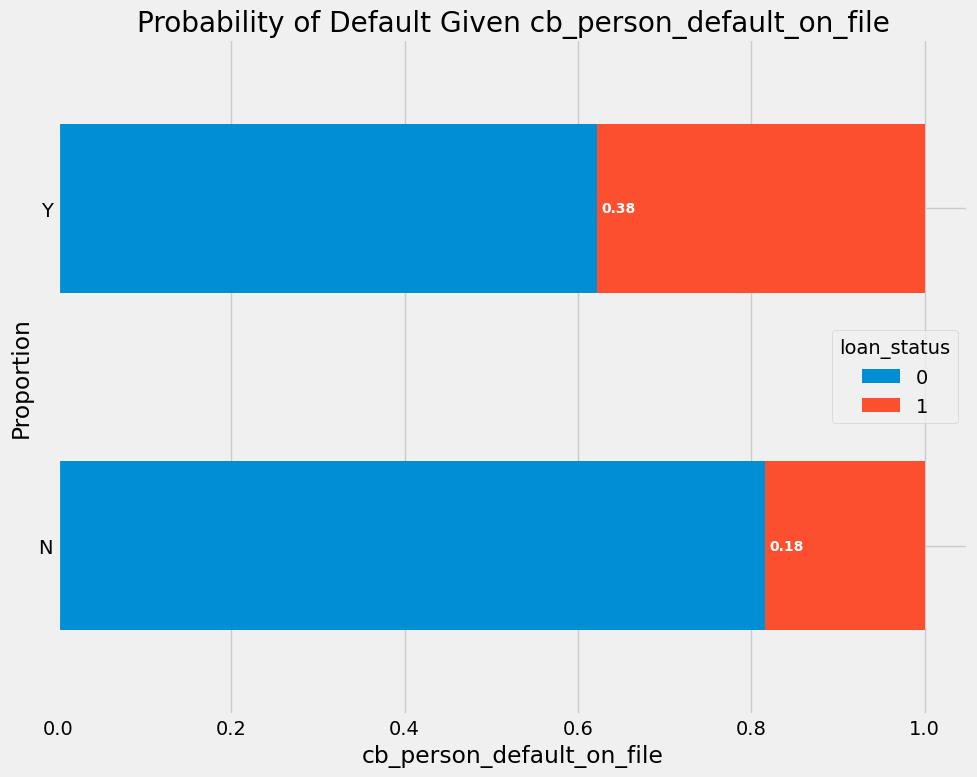

In [18]:
response_variable = 'loan_status'
for predictor_variable in df.select_dtypes('object').columns:
    plot_probability_response_by_categorical(df, predictor_variable, response_variable, (10, 8))

#### Answer
1. `person_home_ownership`: The probability of default is highest among those who still **rent** (32%) and those with **other types** of home ownership (31%).
2. `loan_intent`: The probability of loan default is highest among those who took out loans for **debt consolidation** (29%), followed by **medical needs** (27%), **home improvement** (26%), **personal loans** (20%), **education loans** (17%), and **ventures** (15%).
3. `loan_grade`: The probability of loan default is higher for those who has grade **G** (98%), **F** (71%), **E** (64%), and **D** (59%).
4. `cb_person_default_on_file`: The probability of loan default is higher for those who has history of default (38%).

## How is the correlation amongst numerical predictor variable? (Multicollinearity)
Check if there's an correlation between amongst numerical predictor variables.

In [19]:
def plot_heatmap(df: pd.DataFrame, figsize: Tuple[int, int]) -> None:
    """
    Show the visualization of coefficient correlation amongst features.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure

    # Calculate the coefficient correlation
    corr = df.select_dtypes(include='number').corr()

    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.savefig(f"../reports/figures/correlation_matrix_heatmap.png", bbox_inches = 'tight')
    plt.show()

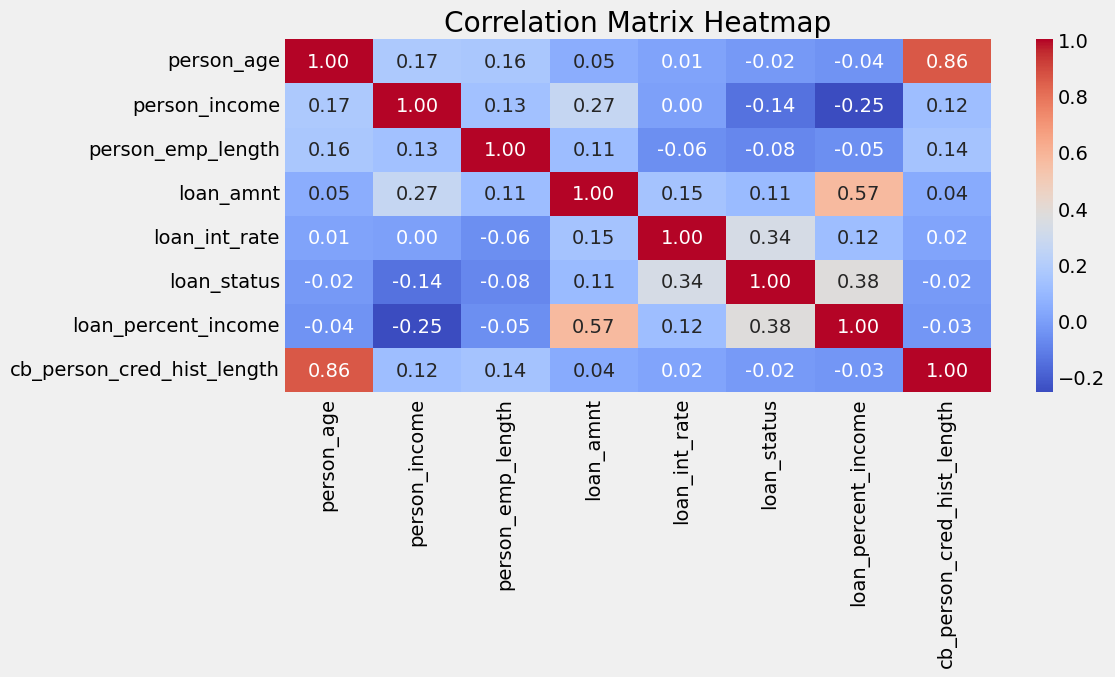

In [20]:
plot_heatmap(df, (12, 7))

In [21]:
def plot_scatter(df: pd.DataFrame, x: str, y: str, figsize: Tuple[int, int]) -> None:
    """
    Show scatter plot between two numerical columns.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        x (str): numerical column for the x-axis.
        y (str): numerical column for the y-axis.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure
    
    # Create scatterplot with customized aesthetics
    sns.scatterplot(x=x, y=y, data=df, color='skyblue', ax=ax)

    # Add trend line
    sns.regplot(x=x, y=y, data=df, scatter=False, color='orange', ci=None, line_kws={'linewidth': 2}, ax=ax)

    # Add labels and title
    ax.set_title(f"Scatter Plot {x} vs {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # Show plot
    plt.tight_layout()
    plt.savefig(f"../reports/figures/scatter_plot_{x}_vs_{y}.png", bbox_inches = 'tight')
    plt.show()

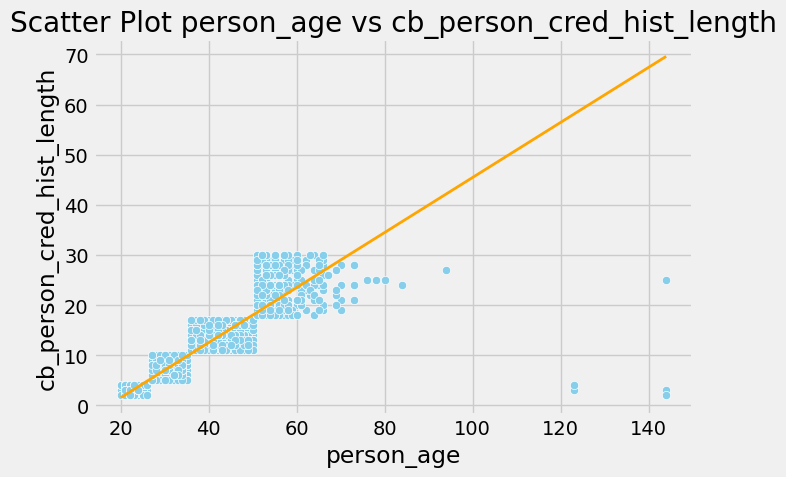

In [22]:
plot_scatter(df, "person_age", "cb_person_cred_hist_length", (7, 5))

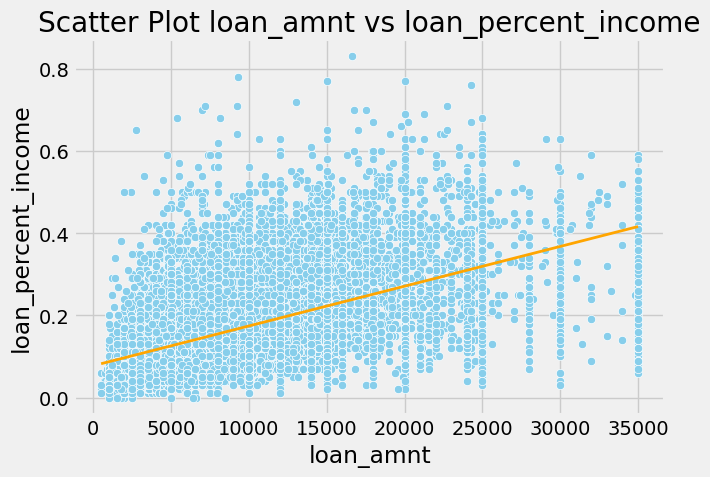

In [23]:
plot_scatter(df, "loan_amnt", "loan_percent_income", (7, 5))

#### Answer
There are multicollinearity amongst numerical predictor variable, such as: `person_age` vs `cb_person_cred_hist_length` and `loan_amnt` vs `loan_percent_income`.